# **Analytics for the Public Good**
> **Group Members**: Anna Jackson, Ryan Young, Connor McWilliams, Sonia Romero, Brett Boos <br>
> **Date**: Spring Quarter 2022 <br>
> **Class**: INFO 3500 Capstone/Senior Project <br>

## **Packages:**

In [3]:
# !pip install chart-tools
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chart_tools as ct
import scipy.stats as stats
from itertools import combinations
from sklearn import metrics, tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

## **Table of Contents<a id="Top"></a>**
1. [Preperation, Framing, Understanding](#1) <br>
    a. [Focus](#1a) <br>
    b. [Questions](#1b) <br>
    c. [Data Collection](#1c) <br>
    d. [Business Understanding](#1d) <br>
    e. [Data Understanding](#1e) <br>
2. [Immersion, Data Preperation, Modeling](#2) <br>
    a. [Hypotheses](#2a) <br>
    b. [Variables](#2b) <br>
    c. [Data Preperation and Integration](#2c) <br>
    d. [Analytic Techniques](#2d) <br>
3. [Incubation, Analysis, Evaluation](#3) <br>
    a. [Importing Data](#3a) <br>
    b. [Descriptive Analysis](#3b) <br>
    c. [Multilinear Regression](#3c)<br>
    d. [Clustering](#3d) <br>
4. [Findings and Recommendations](#4) <br>

### **Preperation, Framing, Understanding**  <a id='1'></a>

### _Focus:_ <a id='1a'></a>
> From the original crime dataset, we are exploring the age range of K-12 (where age < 19) for insight on what type of crimes this age group commits (offense category name) along with where (county name) and when (incident date, incident hour) these crimes occur. We will then tie in various outside data sources in order to apply intricate reasoning and rationale behind the “why”, “where” and “when” these crimes occur by this age range.  

### _Questions:_ <a id='1b'></a>
> **Based on original crime data (Crimes in Colorado):**
> 1. Is there a common set of crimes that our defined age range is committing? 
> 2. Does seasonality play a part in where the crimes are more likely to occur by our defined age range? (e.g., are crimes more likely to occur in the summer months when school is out?) 
> 3. Which district possesses the highest/lowest crime rates by our defined age range? 

> **Based on the District Student Mobility/Stability Statistics data:**
> 1. Do districts that see a higher/lower mobility rate also see a higher/lower crime rate by our defined age range?  
> 2. Do districts with a higher/lower gifted and talented student population also see higher/lower crime rates by our defined age range? What about migrant students, disabled students, English learners, homeless students, or economically disadvantaged student populations? 

### _Data Collection:_ <a id='1c'></a>
> Data has been collected from the state of Colorado using Socrata's API's data.colorado.gov/ endpoint. <br>

> **Crimes in Colorado:**
At the core of our analysis, we will be using the 2016-2019 crime data that was given to us in our capstone class. Additionally, we will use the 1997-2015 version of that same data to better understand changes and patterns over time. <br>

> **District Mobilit/Stabilit Statistics for 2011-2012:**
This dataset will be used to answer questions about student homelessness and other student populations (noted below) from the 2011-2012 school year. This 184-row dataset is aggregated by school year and school district and includes rows for state totals. It contains 60 columns, with aggregations on pupil count, stable student count, stability, mobility, instances for mobility, and mobility incidence for the following student populations: students with disabilities, English language learners, economically disadvantaged, migrant students, title 1 students, homeless students, and gifted & talented students.  

> **Other datasets:**
We used six other crime datasets, six other education datasets, and four general datasets that are explained in detail in status report 1 to further explain the trends in crime. 

### _Business Understanding:_ <a id='1d'></a>
> The business purpose of our project is to equip the Colorado State Police Department with brand new key information on the “why”, “when” and “where” crimes that are occurring by our defined age range (K-12 students) for them to enact mitigation and prevention strategies in order to preserve the safety of Colorado residents.

### _Data Understanding:_ <a id='1e'></a>
> **Combined Crime Data 1997-2019:** <br> 
> Brief Data Exploration:
> 1. 6,770,666 total rows (**825,767** total rows where age < 19 (12.19%))
> 2. Most crimes occur in **Arapahoe** (131,439) and least in **Kiowa** (21)
> 3. Most frequent crime offenses are **larceny/theft offenses** (214,962) and least **human trafficking** (4)
> 4. Most frequent hour crime occurs is **3:00pm** (56,945) and least is **5:00am** (4,861)
> 5. Most frequently the crime was against **property** (444, 841) and least **not a crime** (3)
> 6. Most frequent date crimes occured on **2016-10-02** (576) and least crimes occured on was **Christmas** most years

> **District Student Mobility/Stability  Statistics Data:** <br> 
> Brief Data Exploration: 
> School districts averaged: <br>
> - **Total students**: <br>
> 5,133 total students, 3,853  stable students, 1,266 mobile students  <br>
> - **Disabled students**:<br>
> 460 total** students, 358 disabled stable students, 100 mobile students <br>
> - **English Learning Students:** <br>
> 742 total students, 556 stable students, 184 mobile students  <br>
> - **Economically Disadvantaged Students:** <br>
> 2,021 total students, 1,497 stable students, 514 mobile students <br>
> - **Migrant Students:** <br> 
> 15 total students, 9 stable students, 5 mobile students <br>
> - **Title 1 Students:** <br>
> 1,219 total students, 857 stable students, 353 mobile students <br> 
> - **Homeless Students:** <br>
> 117 total students, 62 stable students, 53 mobile students <br>
> - **Gifted & Talented Students:** <br>
> 401 total students, 364 stable students, 36 mobile students <br>

### **Immersion, Data Preperation, Modeling**  <a id='2'></a>

### _Hypotheses:_ <a id='2a'></a>
> Central to our research will be a linear regression model that predicts crime rate for an area based on its demographics and school systems. Additionally, we intend to conduct clustering analyses to group counties together based on factors that might necessitate different approaches or strategies of law enforcement, though it’s unclear what those factors will be. The hypotheses below highlight our predictions on how certain variables will contribute to the success of our model. 

> **Education:** 
> - Student stability rate will significantly, negatively, predict certain types of crime, such as violence and gang-related activity. 
> - The percentage of adults in a county who don’t have a high school diploma should significantly predict crime rates. 
> - The percentage of grade-school-enrolled students who are in grades 9-12 should significantly predict crime rates; when the number of high-school students falls below the expected mean for a county, this indicates a higher rate of students dropping out, which may predict crime. 
> - Mobility/stability rates of economically disadvantaged students might be able to explain cases in which a county has lower crime rates than expected/predicted by our models. In poor areas, an unexpectedly high stability rate might indicate that the school system or local government has been effective in giving disadvantaged students the support they need to succeed. It’s possible that mobility/stability rates will be mostly dependent upon population density (less mobility in rural areas), so we may need to alter the mobility rates to correct for population density. 

> **Demographics:** <br>
> - The ratio of number of households to total population in a county will significantly predict crime rates. A lower number of households might indicate higher rates of drug-related crimes and homelessness. 
> - The standard deviation of owner-occupied housing unit prices may significantly predict crime. If so, this might be due to a variety of reasons, such as police forces favoring higher-income areas within a county and neglecting others. 
> - The percentage of vacant housing units in a county should significantly predict certain types of crime, such as violence or drug use. 
> - The percentage of U.S. born, out-of-state, residents should negatively predict crime rates in an area, as this is a sign of tourism. 
> - The percentage of owner-occupied housing units which are valued at less than $50,000 should predict crime in an area. 
> - The percentage of below-poverty-line residents who are under the age of 18 may significantly predict certain types of crime, such as violence or gang-related activities.

### _Variables:_ <a id='2b'></a>
> We aim to focus on crime at the county level. A county column has been created for all datasets which did not have one (converted police district to county, and school district to county). <br>
> **Targets:** <br>
> - Predict overall crime rate, given a county 
> - Predict crime rate for each category of crime, given a county 
> - Predict juvenile crime rate, given a county 
> - Datasets: Crimes in Colorado, Crime Arrests, Crime Offenses 
> **Predictors:** <br>
> - County demographics (33 of 157 continuous columns selected) 
> - Crime demographics – age, gender, year (from crime datasets above) 
> - Education demographics – (enrollment, graduation, mobility, stability) 
> - Additional Datasets: Student Mobility/Stability Statistics, Graduation Data, and Census Counties in Colorado

### _Data Preperation and Integration:_ <a id='2c'></a>
> Standardizing the geographic location granularity across all datasets was the biggest technical challenge in our data preparation. In their raw form, not a single pair of datasets could be merged, nor could comparisons be made across groups. Each dataset was indexed by either county, or a district-related field, but naming conventions for such fields were not standardized. The following steps were taken to ensure that each dataset could be aggregated by county: <br> 
> **Standardize and combine crime records across 97-15 data and 16-19 data**
> - County naming conventions differed across datasets. The old crime data used primary_county, whereas the new data included both the primary and secondary county in a single string. These were modified to remove the secondary county. 
> - Police department naming conventions differed across datasets. These were standardized. 
> - Crime data from State Patrol and Colorado Bureau of Investigation were removed. 
> - The 97-15 and 16-19 crime datasets were concatenated into a single table. <br>
> **Add county to the aggregate crime rate datasets (Crime Arrests, Crime Offenses)**
> - Unique police departments and counties were retrieved from crime records from the previous step, to use for string matching. 
> - The two aggregated crime datasets have different naming conventions for police department, so they were first modified to use the same names as each other and were further modified to use the same names as the crime records data from the previous step. 
> - Finally, the county column was merged in. <br>
> **Add county to education datasets (Student Mobility, Graduation Rate)**
> - The Student Mobility data does not provide a county column, but the Graduation Rate data does. This column was merged into the Student Mobility data. <br>
>**Pivot and aggregate the County Population dataset**
> - This dataset has nearly 400,000 rows despite being aggregated already. It offers a separate row for each individual age, for each county, for each year. First, the data was aggregated into two age groups (minor, adult). 
> - Next, the age range column was eliminated, and the data was pivoted to be indexed by county and year to remove redundancy. <br>
>**Pivot and aggregate the County Population dataset**
> - The census data contains roughly 150 variables. We selected the 33 variables which seemed most useful. The Census Field Descriptions dataset from Socrata was used to interpret variables. 
> - The 8 columns for race were reduced to: hispanic, white, black, other. 
> - Housing price distributions were described by 11 bins. We reduced these to 6 bins. 

### _Analytic Techniques:_ <a id='2d'></a>
> **Descriptive Analysis:**
> Once the data has been prepared, we will create an initial set of visualizations to better understand the data. This will include correlation matrices, histograms, and time series plots. Additional visualizations will be created once the research is complete, to communicate key findings. <br>
> **Multilinear Regression:**
> We aim to predict the overall crime rate in an area based on education and census data. In a practical setting, this model is intended to be used when future predictions have been made about general statistics/demographics in an area (i.e. estimated population growth, etc.), and a prediction must be made for how crime rates will respond to such changes. <br>
> **Clustering:**
> In addition to forecasting and predictions, it’s also desirable to create models that help law enforcers better understand what makes their area/county different. Therefore, we intend to create one or more clustering analyses to place counties into categories that differ in ways that are most meaningful to local police departments. For instance, in each cluster, law enforcement agencies might wish to take different approaches to the following: who to hire, where to direct manpower, how to charge violators in certain situations, how to interpret risk in certain situations, effective scheduling, etc. 

### **Incubation, Analysis, Evaluation**  <a id='3'></a>

### _Importing Data:_   <a id='3a'></a>

In [4]:
# Import crime data
# df_crime = pd.read_csv (r'C:\Users\kenda\OneDrive\Desktop\Anna\all.csv')
# df_crime.head()

In [5]:
# Alter crime data to only show ages < 19 
# df_crime_19 = df_crime.loc[df_crime['age']<19]
# df_crime_19.head()

In [6]:
# Import aggregated crime data 
# df_agg_cat = pd.read_csv(r'C:\Users\kenda\OneDrive\Desktop\Anna\crime_agg_category.csv')
df_agg_cat = pd.read_csv(r'../prepared_data/crime_records/output/crime_agg_category.csv')
df_agg_cat.head()

,year,county,count,age_avg,quarter_mode,month_mode,day_of_week_mode,hour_mode,against_person,against_property,...,kidnapping,larceny_theft,porn,property_damage,prostitution,robbery,sex_offense,stolen_property,vehicle_theft,weapon_law
0,1997,ADAMS,22947,24.582071,1.0,3.0,0.0,17.0,3047.0,17766.0,...,50.0,8023.0,1.0,5467.0,14.0,189.0,316.0,245.0,1317.0,274.0
1,1997,ALAMOSA,404,27.098901,3.0,8.0,5.0,18.0,101.0,264.0,...,0.0,165.0,0.0,73.0,0.0,0.0,9.0,0.0,6.0,4.0
2,1997,ARAPAHOE,37555,25.209156,3.0,8.0,4.0,18.0,4568.0,28573.0,...,249.0,14345.0,0.0,5856.0,198.0,238.0,434.0,421.0,2537.0,695.0
3,1997,ARCHULETA,578,23.603053,4.0,10.0,4.0,9.0,24.0,487.0,...,1.0,291.0,0.0,129.0,0.0,0.0,6.0,0.0,10.0,10.0
4,1997,BACA,49,22.461538,1.0,1.0,2.0,11.0,1.0,48.0,...,0.0,19.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Import education data
# df_education = pd.read_csv(r'C:\Users\kenda\OneDrive\Desktop\Anna\all_education.csv')
df_education = pd.read_csv(r'../prepared_data/combined/output/all_education.csv')
df_education.head()

,Unnamed: 0,county,pupil_total,stable,mobile,mobile_instances,disabled_pupil_total,disabled_stable,disabled_mobile,disabled_mobile_instances,...,white_mobile_instances_rate,black_stable_rate,black_mobile_rate,black_mobile_instances_rate,hispanic_stable_rate,hispanic_mobile_rate,hispanic_mobile_instances_rate,asian_stable_rate,asian_mobile_rate,asian_mobile_instances_rate
0,0,ADAMS,98546.0,67272.0,31222.0,33925.0,8848.0,6263.0,2588.0,2896.0,...,32.45,54.66,45.08,47.91,67.49,32.71,36.40,78.55,21.37,23.54
1,1,ALAMOSA,2775.0,1882.0,885.0,950.0,223.0,159.0,63.0,66.0,...,35.54,57.14,42.86,42.86,70.15,29.47,32.69,64.00,36.00,36.00
2,2,ARAPAHOE,124639.0,94109.0,30134.0,32269.0,11842.0,9461.0,2354.0,2568.0,...,21.16,67.47,32.03,34.57,72.76,26.75,29.20,78.59,21.30,22.56
3,3,ARCHULETA,1641.0,1218.0,422.0,452.0,125.0,100.0,25.0,28.0,...,27.22,66.67,33.33,33.33,76.79,23.21,24.69,73.33,26.67,26.67
4,4,BACA,988.0,577.0,411.0,421.0,70.0,45.0,25.0,25.0,...,37.43,71.43,28.57,28.57,40.61,59.39,61.42,0.00,100.00,100.00


In [8]:
# Import demographic data
# df_demographic = pd.read_csv(r'C:\Users\kenda\OneDrive\Desktop\Anna\county_stats_normalized.csv')
df_demographic = pd.read_csv(r'../prepared_data/combined/output/county_stats_normalized.csv')
df_demographic.head()

,Unnamed: 0,year,county,pop,age_over18_prop,age_undr19_prop,gend_m_prop,gend_f_prop,age_undr19_gend_m_prop,age_undr19_gend_f_prop,...,inc_per_cap,citz_per_cap,hu_per_cap,age_median,inc_hh_median,hh_size_avg,hu_oo_freq_val_ord,hu_oo_freq_val,hu_blt_freq_yr_ord,hu_blt_freq_yr
0,0,2012.0,ADAMS,460468.0,0.705276,0.294724,0.502904,0.497107,0.511838,0.488162,...,24357,0.860368,0.354520,32.4,56633,2.91,3,v150k_250k,7,b2000_2009
1,1,2012.0,ALAMOSA,15606.0,0.728374,0.271626,0.501282,0.499295,0.519226,0.482189,...,19657,0.968986,0.421120,32.2,38045,2.49,2,v50k_150k,1,b1949_e
2,2,2012.0,ARAPAHOE,596226.0,0.737078,0.262922,0.490666,0.509325,0.512506,0.487487,...,32845,0.872052,0.399446,35.7,60400,2.55,3,v150k_250k,4,b1970_1979
3,3,2012.0,ARCHULETA,11989.0,0.795646,0.204354,0.503211,0.497122,0.529388,0.469388,...,29771,0.994578,0.729168,47.5,54007,2.64,4,v250k_400k,7,b2000_2009
4,4,2012.0,BACA,3702.0,0.775797,0.224203,0.495948,0.504862,0.508434,0.492771,...,22436,1.004052,0.608590,47.8,39497,2.18,2,v50k_150k,1,b1949_e


### _Descriptive Analysis:_ <a id='3b'></a>

### _Multilinear Regression:_ <a id='3c'></a>

In [9]:
# Merging datasets 
# Combining the aggregated category crime dataset with the demographic dataset 
df_crime_demo = pd.merge(df_agg_cat, df_demographic, on = ['year', 'county'])

# Combining the aggregated category crime dataset with the education dataset 
df_crime_edu = pd.merge(df_agg_cat, df_education, on = 'county')

In [10]:
# Creating dataframe for first linear regression to run 
# Using 2019 (most recent year in dataset)
df_crime_demo_2019 = df_crime_demo.loc[df_crime_demo['year']==2019]

In [11]:
# Creating dataframe from second linear regression to run 
# Using 2012 (only year education dataset provides)
df_crime_edu_2012 = df_crime_edu.loc[df_crime_edu['year']==2012]

#### _First Regression:_ Crime & Demographic datasets for 2019 <a id='3c'></a>

In [12]:
# ,"gend_m_prop","age_undr19_gend_m_prop","age_over18_gend_m_prop","gend_m_age_undr19_prop","gend_f_age_undr19_prop","race_prop_stdev"

<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
/var/folders/__/gg8nk49s0dd1tsj95nvdbhsr0000gn/T/ipykernel_3233/1764254716.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  "gend_m_prop","age_undr19_gend_m_prop","age_over18_gend_m_prop","gend_m_age_undr19_prop","gend_f_age_undr19_prop","race_prop_stdev"("")
/var/folders/__/gg8nk49s0dd1tsj95nvdbhsr0000gn/T/ipykernel_3233/1764254716.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  "gend_m_prop","age_undr19_gend_m_prop","age_over18_gend_m_prop","gend_m_age_undr19_prop","gend_f_age_undr19_prop","race_prop_stdev"("")
/var/folders/__/gg8nk49s0dd1tsj95nvdbhsr0000gn/T/ipykernel_3233/1764254716.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  "gend_m_prop","age_undr19_gend_m_prop","age_over18_gend_m_prop","gend_m_age_undr19_prop","gend_f_age_u

TypeError: 'str' object is not callable

In [37]:
# Defining variables
X = df_crime_demo_2019[[
    "pop",
    "age_over18_prop",
    "race_hispanic_prop",
    "race_white_prop",
    # "race_black_prop",
    # "race_asian_prop",
    "hsgrad_graduated_prop",
    "civ_lf_prop",
    "civ_lf_employed_prop",
    "ps_total_prop",
    # "ps_undr18_total_prop",
    # "ps_undr18_prop",
    "stud_hs_prop",
    "stud_undergrad_prop",
    "stud_enrolled_prop",
    "citz_birth_prop",
    "citz_co_prop",
    "hu_occ_prop",
    "hu_blt_2000_plus_prop",
    "hu_oo_lt_50_prop",
    "hu_oo_50_150_prop",
    "hu_oo_150_250_prop",
    "hu_oo_250_400_prop",
    "hu_oo_400_750_prop",
    # "inc_per_cap",
    "citz_per_cap",
    "hu_per_cap",
    "age_median"
    ]]
y = df_crime_demo_2019["count"]

# Partition data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

#Random_state works like a seed so can replicate results
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(train_X,train_y) #Training the algorithm
pred_train_y = model.predict(train_X)

def p_vals_per_coef(pred, y, coefs, X): 
    sse = np.sum((pred - y) ** 2)/ (X.shape[0] - X.shape[1])
    standard_error = np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))
    t_stats = coefs / standard_error 
    p_vals = 2 * (1 - stats.t.cdf(np.abs(t_stats), y.shape[0] - X.shape[1])) 
    return list(p_vals)

p_vals=p_vals_per_coef(pred_train_y, train_y, model.coef_, train_X)


def rsq_adj(mod, X, y) -> float:
    """
    Calculate adjusted r-square value
    """
    rsq = mod.score(X, y)
    n, k = y.shape[0], len(X.columns)
    return 1 - (((1-rsq) * (n - 1)) / (n - k - 1))

In [38]:
def reg_metrics(model, model_name, train_X, train_y, test_X, test_y):
    pred_test_y = model.predict(test_X)
    pred_train_y = model.predict(train_X)
    metrics_table = pd.DataFrame({'Model': [model_name, model_name],
                              'Dataset':['Training','Validation'],
                              'MAE': [metrics.mean_absolute_error(train_y, pred_train_y),
                                      metrics.mean_absolute_error(test_y, pred_test_y)],
                            'MSE': [metrics.mean_squared_error(train_y, pred_train_y),
                                      metrics.mean_absolute_error(test_y, pred_test_y)],
                            'RMSE': [np.sqrt(metrics.mean_squared_error(train_y, pred_train_y)),
                                     np.sqrt(metrics.mean_squared_error(test_y, pred_test_y))],
                             'R-Sq': [model.score(train_X,train_y),
                                     model.score(test_X,test_y)],
                                 'R_Sq_Adj': [rsq_adj(model, train_X, train_y),
                                         rsq_adj(model, test_X, test_y)]})
    return metrics_table
reg_intercept = pd.DataFrame({'columns' : 'Intercept',
                             'coefficients' : round(model.intercept_,2)},
                             index=[0])
coef_table = pd.DataFrame({'columns' : train_X.columns,
                        'coefficients' : model.coef_,
                      'pvals' : p_vals})
# Show reults 
display(reg_intercept.round(4))
display(coef_table.round(4))
reg_metrics(model, 'Regression',train_X, train_y, test_X, test_y)

,columns,coefficients
0,Intercept,-132497.52


,columns,coefficients,pvals
0,pop,0.0632,0.0005
1,age_over18_prop,49572.7349,0.6101
2,race_hispanic_prop,-32183.8235,0.6091
3,race_white_prop,-29991.4434,0.6660
4,hsgrad_graduated_prop,-21096.4725,0.5608
5,civ_lf_prop,36559.4915,0.4982
6,civ_lf_employed_prop,70609.7483,0.3305
7,ps_total_prop,65478.8023,0.2894
8,stud_hs_prop,2178.2103,0.9388
9,stud_undergrad_prop,-34026.5122,0.2558


,Model,Dataset,MAE,MSE,RMSE,R-Sq,R_Sq_Adj
0,Regression,Training,2185.026302,1.152705e+07,3395.151567,0.910510,0.738987
1,Regression,Validation,5790.395703,5.790396e+03,8555.894659,0.652749,-7.334027


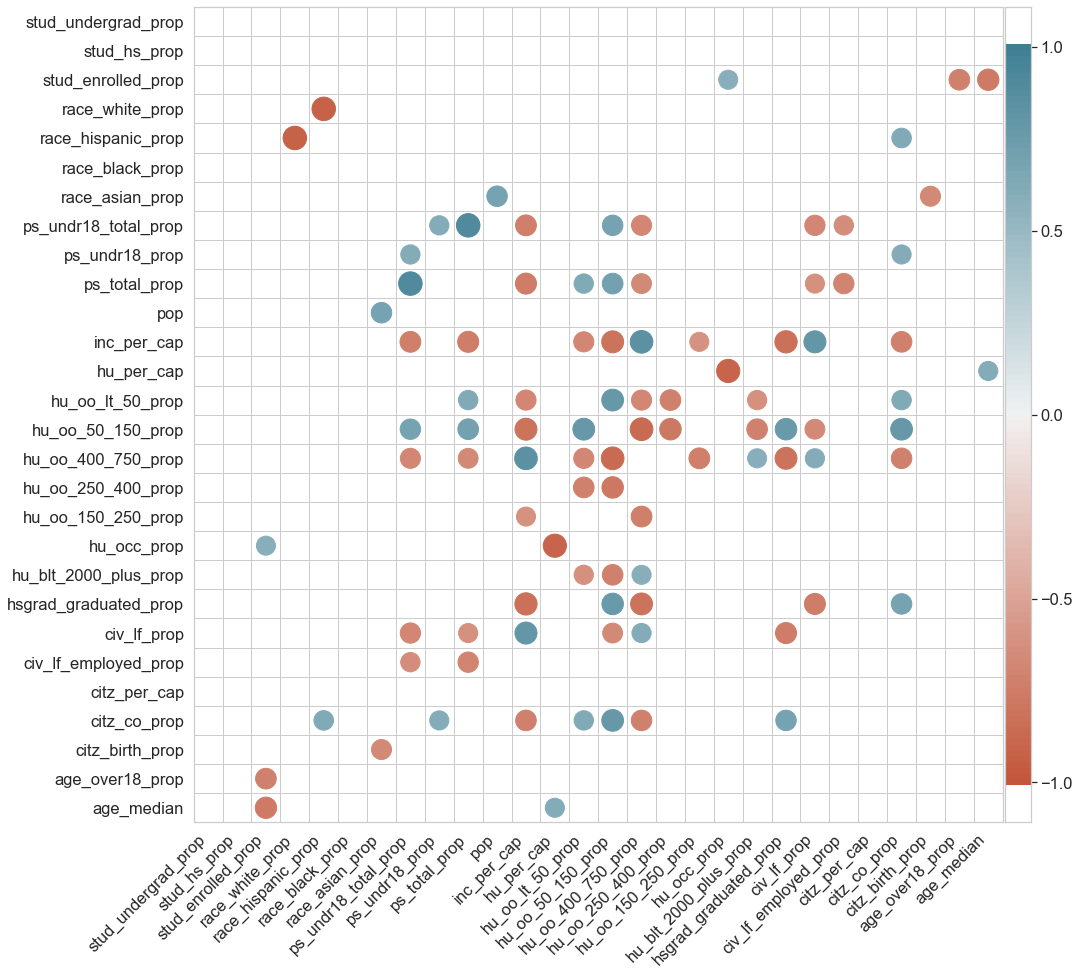

In [18]:
ct.set_style(15, font_scale=1.5) # sets chart size to 10x10 square, with enlarged font
# Heatmap with dynamically sized marks, and correlations below 0.15 hidden
ct.superheat(X.corr(), thresh_mask=0.6, half_mask=False, marker='o', mark_scale=6);

#### _Second Regression:_ Crime & Education datasets for 2012 <a id='3c'></a>

In [ ]:
# Defining variables
X2 = df_crime_edu_2012[["pupil_total","stable","disabled_pupil_total","disabled_stable","limited_eng_pupil_total","limited_eng_stable","poor_pupil_total","poor_stable","migrant_pupil_total","migrant_stable","title_1_pupil_total","title_1_stable","homeless_pupil_total","homeless_stable","female_pupil_total","female_stable","asian_pupil_total","asian_stable","black_pupil_total","black_stable","hispanic_pupil_total","hispanic_stable"]]
y2 = df_crime_edu_2012["count"]

# Partition data
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#Random_state works like a seed so can replicate results
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(train_X,train_y) #Training the algorithm
pred_train_y = regressor.predict(train_X)

def p_vals_per_coef(pred, y, coefs, X): 
    sse = np.sum((pred - y) ** 2)/ (X.shape[0] - X.shape[1])
    standard_error = np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))
    t_stats = coefs / standard_error 
    p_vals = 2 * (1 - stats.t.cdf(np.abs(t_stats), y.shape[0] - X.shape[1])) 
    return list(p_vals)

p_vals=p_vals_per_coef(pred_train_y,train_y,regressor.coef_,train_X)

def rsq_adj(mod, X, y) -> float:
    """
    Calculate adjusted r-square value
    """
    rsq = mod.score(X, y2)
    n, k = y.shape[0], len(X.columns)
    return 1 - (((1-rsq) * (n - 1)) / (n - k - 1))

In [ ]:
def reg_metrics(model, model_name, train_X, train_y, valid_X, valid_y):
    pred_valid_y = model.predict(valid_X)
    pred_train_y = model.predict(train_X)
    metrics_table = pd.DataFrame({'Model': [model_name, model_name],
                              'Dataset':['Training','Validation'],
                              'MAE': [metrics.mean_absolute_error(train_y, pred_train_y),
                                      metrics.mean_absolute_error(valid_y, pred_valid_y)],
                            'MSE': [metrics.mean_squared_error(train_y, pred_train_y),
                                      metrics.mean_absolute_error(valid_y, pred_valid_y)],
                            'RMSE': [np.sqrt(metrics.mean_squared_error(train_y, pred_train_y)),
                                     np.sqrt(metrics.mean_squared_error(valid_y, pred_valid_y))],
                             'R-Sq': [model.score(train_X,train_y),
                                     model.score(valid_X,valid_y)],
                                 'R_Sq_Adj': [rsq_adj(model, train_X, train_y),
                                         rsq_adj(model, valid_X, valid_y)]})
    return metrics_table
reg_intercept = pd.DataFrame({'columns' : 'Intercept',
                             'coefficients' : round(regressor.intercept_,2)},
                             index=[0])
coef_table = pd.DataFrame({'columns' : train_X.columns,
                        'coefficients' : regressor.coef_,
                      'pvals' : p_vals})
# Show reults 
display(reg_intercept.round(4))
display(coef_table.round(4))
reg_metrics(regressor, 'Regression',train_X, train_y, valid_X, valid_y)

,columns,coefficients
0,Intercept,-161032.83


,columns,coefficients,pvals
0,pop,0.0487,0.0010
1,age_over18_prop,-117589.7512,0.1543
2,race_hispanic_prop,4145.9775,0.9183
3,race_white_prop,9160.0598,0.8395
4,race_black_prop,447173.1152,0.0005
5,race_asian_prop,119290.5017,0.4822
6,hsgrad_graduated_prop,26509.1218,0.3587
7,civ_lf_prop,-10454.6158,0.8514
8,civ_lf_employed_prop,39516.7469,0.4050
9,ps_total_prop,347797.4463,0.0692


,Model,Dataset,MAE,MSE,RMSE,R-Sq,R_Sq_Adj
0,Regression,Training,1249.973595,2.277894e+06,1509.269407,0.982316,0.966842
1,Regression,Validation,14762.829394,1.476283e+04,20285.906034,-0.952098,-2.660184


In [ ]:
ct.set_style(10, font_scale=1.5) # sets chart size to 10x10 square, with enlarged font
# Heatmap with dynamically sized marks, and correlations below 0.15 hidden
ct.superheat(X2.corr(), thresh_mask=0.15, half_mask=False, marker='o', mark_scale=6);

NameError: name 'X2' is not defined

### _Clustering:_ <a id='3d'></a>

### **Findings and Recommendations**  <a id='4'></a>